In [2]:
!pip install --force-reinstall ibm_db==3.1.0 ibm_db_sa==0.3.3
!pip uninstall sqlalchemy==1.4 -y && pip install sqlalchemy==1.3.24
!pip install ipython-sql

     |████████████████████████████████| 797 kB 36.6 MB/s            
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - \ | / - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - \ | / done
  Preparing metadata (setup.py) ... - done
     |████████████████████████████████| 1.6 MB 58.8 MB/s            
     |████████████████████████████████| 156 kB 49.7 MB/s            
  Created wheel for ibm-db: filename=ibm_db-3.1.0-cp38-cp38-linux_x86_64.whl size=41390378 sha256=18ef348c568e51ac2874b7df1d81f815f6a3baf8bc2e6ce45a6aabbad39d55ca
  Stored in directory: /home/datalore/.cache/pip/wheels/43/71/0a/3065745bc1dc4cafbdcb09e2557082609f7689b16108b670df
  Created wheel for ibm-db-sa: filename=ibm_db_sa-0.3.3-py3-none-any.whl size=27410 sha256=015e10ef5f184a18455ad36c488925b82358a38b5aa8b24fac3beff4bf1d6b51
  Stored in directory: /home/datalore/.cache/pip/wheels/ca/a9/b6/4f6402aa714d6e

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
import seaborn as sns

## Load SQL Magic

In [4]:
%load_ext sql

## **Connect to IBM Db2**

In [5]:
%sql ibm_db_sa://fll09902:zYyCJdgrLqPHagh7@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB?security=SSL

%sql ibm_db_sa://

## **Count Number of Columns in 3 Tables**

In [103]:
%sql select count(*) AS SCHOOL_COLUMNS from SYSCAT.COLUMNS where TABNAME = 'CHI_SCHOOL'



 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


school_columns
78


In [106]:
%sql select count(*) AS CRIME_COLUMNS from SYSCAT.COLUMNS WHERE TABNAME='CHI_CRIME'

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


crime_columns
21


In [112]:
%sql select count(*)as Census_columns  from SYSCAT.COLUMNS WHERE TABNAME='CHI_CENSUS'

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


census_columns
9


## Identify column names per table

In [53]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CHI_SCHOOL'

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


colname,typename,length
SCHOOL_ID,INTEGER,4
NAME_OF_SCHOOL,VARCHAR,64
"Elementary, Middle, or High School",VARCHAR,2
STREET_ADDRESS,VARCHAR,29
CITY,VARCHAR,7
STATE,VARCHAR,2
ZIP_CODE,INTEGER,4
PHONE_NUMBER,VARCHAR,14
LINK,VARCHAR,78
NETWORK_MANAGER,VARCHAR,40


In [115]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CHI_CENSUS'

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


colname,typename,length
COMMUNITY_AREA_NUMBER,SMALLINT,2
COMMUNITY_AREA_NAME,VARCHAR,22
PERCENT_OF_HOUSING_CROWDED,DECIMAL,4
PERCENT_HOUSEHOLDS_BELOW_POVERTY,DECIMAL,4
PERCENT_AGED_16__UNEMPLOYED,DECIMAL,4
PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,DECIMAL,4
PERCENT_AGED_UNDER_18_OR_OVER_64,DECIMAL,4
PER_CAPITA_INCOME,INTEGER,4
HARDSHIP_INDEX,SMALLINT,2


In [116]:
%sql select COLNAME, TYPENAME, LENGTH from SYSCAT.COLUMNS where TABNAME = 'CHI_CRIME'

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


colname,typename,length
ID,INTEGER,4
CASE_NUMBER,VARCHAR,8
DATE,DATE,4
BLOCK,VARCHAR,35
IUCR,VARCHAR,4
PRIMARY_TYPE,VARCHAR,15
DESCRIPTION,VARCHAR,46
LOCATION_DESCRIPTION,VARCHAR,33
ARREST,VARCHAR,5
DOMESTIC,VARCHAR,5


# **Analyzing CHI_SCHOOL Data**

In [158]:
%%sql select COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME,"Elementary, Middle, or High School" as SCHOOL_TYPE, SAFETY_SCORE, 
AVERAGE_STUDENT_ATTENDANCE, AVERAGE_TEACHER_ATTENDANCE, PARENT_ENGAGEMENT_SCORE,sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments
from 
CHI_SCHOOL 
GrOUP BY "Elementary, Middle, or High School",COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SAFETY_SCORE	, 
AVERAGE_STUDENT_ATTENDANCE, AVERAGE_TEACHER_ATTENDANCE, PARENT_ENGAGEMENT_SCORE
order by "Elementary, Middle, or High School"
limit 10

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


community_area_number,community_area_name,school_type,safety_score,average_student_attendance,average_teacher_attendance,parent_engagement_score,total_college_enrollments
14,ALBANY PARK,ES,43,96.20%,94.60%,46,1299
14,ALBANY PARK,ES,43,96.40%,95.90%,51,1023
14,ALBANY PARK,ES,67,95.60%,96.00%,50,359
14,ALBANY PARK,ES,75,96.30%,94.80%,65,919
14,ALBANY PARK,ES,91,96.60%,96.30%,55,269
14,ALBANY PARK,ES,None,96.50%,96.90%,49,1239
57,ARCHER HEIGHTS,ES,48,95.30%,96.80%,49,1503
34,ARMOUR SQUARE,ES,32,98.40%,96.20%,43,664
34,ARMOUR SQUARE,ES,49,97.80%,96.90%,48,492
70,ASHBURN,ES,35,94.80%,95.60%,48,537


# **Plotting different relationships between data to figure out correlations** 
What impacts college enrollments?

In [160]:
CHI_SCHOOL=%sql select COMMUNITY_AREA_NUMBER, COMMUNITY_AREA_NAME,"Elementary, Middle, or High School" as SCHOOL_TYPE, SAFETY_SCORE,AVERAGE_STUDENT_ATTENDANCE, AVERAGE_TEACHER_ATTENDANCE, PARENT_ENGAGEMENT_SCORE,sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments from CHI_SCHOOL GrOUP BY "Elementary, Middle, or High School",COMMUNITY_AREA_NAME, COMMUNITY_AREA_NUMBER, SAFETY_SCORE	,AVERAGE_STUDENT_ATTENDANCE, AVERAGE_TEACHER_ATTENDANCE, PARENT_ENGAGEMENT_SCORE order by "Elementary, Middle, or High School"

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


In [163]:
CHI_SCHOOL_ANALYSIS=pd.DataFrame(CHI_SCHOOL)

**Renaming columns**

In [167]:
CHI_SCHOOL_ANALYSIS.rename(columns={0:'COMMUNITY_AREA_NUMBER',1:'COMMUNITY_AREA_NAME',2:'SCHOOL_TYPE',3:' SAFETY_SCORE',4:'AVERAGE_STUDENT_ATTENDANCE',5:'AVERAGE_TEACHER_ATTENDANCE',6:'PARENT_ENGAGEMENT_SCORE',7:'Total_College_Enrollments'}, inplace=True)

In [168]:
CHI_SCHOOL_ANALYSIS

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,SCHOOL_TYPE,SAFETY_SCORE,AVERAGE_STUDENT_ATTENDANCE,AVERAGE_TEACHER_ATTENDANCE,PARENT_ENGAGEMENT_SCORE,Total_College_Enrollments
0,14,ALBANY PARK,ES,43.0,96.20%,94.60%,46,1299
1,14,ALBANY PARK,ES,43.0,96.40%,95.90%,51,1023
2,14,ALBANY PARK,ES,67.0,95.60%,96.00%,50,359
3,14,ALBANY PARK,ES,75.0,96.30%,94.80%,65,919
4,14,ALBANY PARK,ES,91.0,96.60%,96.30%,55,269
...,...,...,...,...,...,...,...,...
561,16,IRVING PARK,MS,39.0,94.00%,96.00%,NDA,435
562,39,KENWOOD,MS,57.0,91.40%,95.70%,NDA,222
563,22,LOGAN SQUARE,MS,38.0,94.30%,96.00%,50,586
564,59,MCKINLEY PARK,MS,60.0,96.10%,97.40%,43,389


**Finding Relationship between Average student attendance, Parent Engagement and Total College Enrollments**

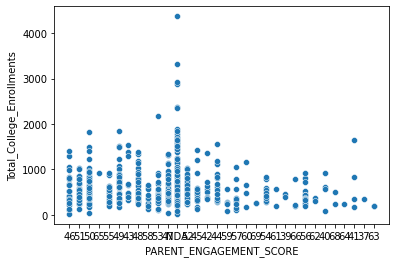

In [171]:
sns.scatterplot(x = "PARENT_ENGAGEMENT_SCORE", y = "Total_College_Enrollments", data = CHI_SCHOOL_ANALYSIS)


In [0]:
sns.scatterplot(x = "AVERAGE_STUDENT_ATTENDANCE", y = "Total_College_Enrollments", data = CHI_SCHOOL_ANALYSIS)

**From the above graphs it is clear that neither parent engagement nor studnt attendence affects college enrollments, so let's examine the census data to analyze the socio economi status for students and how it affect their college enrollments**

In [174]:
%%sql select cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,
cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX ,
sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments 
from chi_census as cen inner join chi_school as sc on cen.community_area_number=sc.community_area_number
group by cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,
cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX
limit 10

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,per_capita_income,hardship_index,total_college_enrollments
1,Rogers Park,7.7,23.6,8.7,18.2,23939,39,4068
2,West Ridge,7.8,17.2,8.8,20.8,23040,46,8197
3,Uptown,3.8,24.0,8.9,11.8,35787,20,4388
4,Lincoln Square,3.4,10.9,8.2,13.4,37524,17,4132
5,North Center,0.3,7.5,5.2,4.5,57123,6,7541
6,Lake View,1.1,11.4,4.7,2.6,60058,5,7055
7,Lincoln Park,0.8,12.3,5.1,3.6,71551,2,5615
8,Near North Side,1.9,12.9,7.0,2.5,88669,1,3362
9,Edison Park,1.1,3.3,6.5,7.4,40959,8,910
10,Norwood Park,2.0,5.4,9.0,11.5,32875,21,6469


In [28]:
CHI_CENSUS=%sql select cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX ,sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments from chi_census as cen inner join chi_school as sc on cen.community_area_number=sc.community_area_number group by cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


In [29]:
CHI_CENSUS_ANALYSIS=pd.DataFrame(CHI_CENSUS)

In [30]:
CHI_CENSUS_ANALYSIS.head()

,0,1,2,3,4,5,6,7,8
0,1,Rogers Park,7.7,23.6,8.7,18.2,23939,39,4068
1,2,West Ridge,7.8,17.2,8.8,20.8,23040,46,8197
2,3,Uptown,3.8,24.0,8.9,11.8,35787,20,4388
3,4,Lincoln Square,3.4,10.9,8.2,13.4,37524,17,4132
4,5,North Center,0.3,7.5,5.2,4.5,57123,6,7541


In [31]:
CHI_CENSUS_ANALYSIS.rename(columns={0:'COMMUNITY_AREA_NUMBER',1:'COMMUNITY_AREA_NAME',2:'PERCENT_OF_HOUSING_CROWDED',3:'PERCENT_HOUSEHOLDS_BELOW_POVERTY',4:'PERCENT_AGED_16_UNEMPLOYED',5:'PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA',6:'PER_CAPITA_INCOME',7:'HARDSHIP_INDEX', 8:'Total_College_Enrollments'}, inplace=True)

In [32]:
CHI_CENSUS_ANALYSIS

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16_UNEMPLOYED,PERCENT_AGED_25_WITHOUT_HIGH_SCHOOL_DIPLOMA,PER_CAPITA_INCOME,HARDSHIP_INDEX,Total_College_Enrollments
0,1,Rogers Park,7.7,23.6,8.7,18.2,23939,39,4068
1,2,West Ridge,7.8,17.2,8.8,20.8,23040,46,8197
2,3,Uptown,3.8,24.0,8.9,11.8,35787,20,4388
3,4,Lincoln Square,3.4,10.9,8.2,13.4,37524,17,4132
4,5,North Center,0.3,7.5,5.2,4.5,57123,6,7541
...,...,...,...,...,...,...,...,...,...
72,73,Washington Height,1.1,16.9,20.8,13.7,19713,48,4006
73,74,Mount Greenwood,1.0,3.4,8.7,4.3,34381,16,2091
74,75,Morgan Park,0.8,13.2,15.0,10.8,27149,30,3271
75,76,O'Hare,3.6,15.4,7.1,10.9,25828,24,786


# **Plotting different relationships between data to figure out correlations**

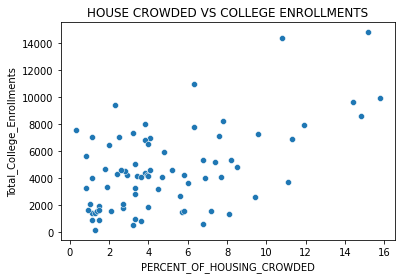

In [182]:
ax = sns.scatterplot(x = "PERCENT_OF_HOUSING_CROWDED", y = "Total_College_Enrollments", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PERCENT_OF_HOUSING_CROWDED",
      ylabel = "Total_College_Enrollments",
      title = "HOUSE CROWDED VS COLLEGE ENROLLMENTS")

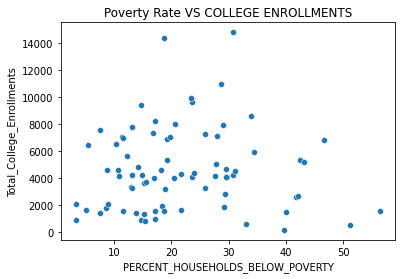

In [33]:
ax = sns.scatterplot(x = "PERCENT_HOUSEHOLDS_BELOW_POVERTY", y = "Total_College_Enrollments", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PERCENT_HOUSEHOLDS_BELOW_POVERTY",
      ylabel = "Total_College_Enrollments",
      title = "Poverty Rate VS COLLEGE ENROLLMENTS")

In [0]:
sns.scatterplot(x = "PERCENT_OF_HOUSING_CROWDED", y = "Total_College_Enrollments", data = CHI_CENSUS_ANALYSIS)

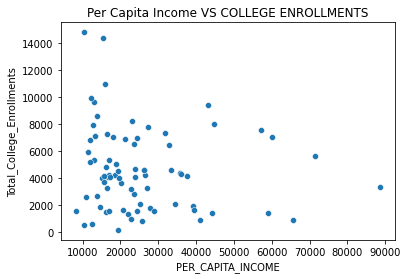

In [187]:
ax = sns.scatterplot(x = "PER_CAPITA_INCOME", y = "Total_College_Enrollments", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PER_CAPITA_INCOME",
      ylabel = "Total_College_Enrollments",
      title = "Per Capita Income VS COLLEGE ENROLLMENTS")

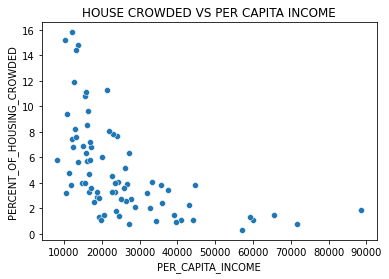

In [188]:
ax = sns.scatterplot(x = "PER_CAPITA_INCOME", y = "PERCENT_OF_HOUSING_CROWDED", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PER_CAPITA_INCOME",
      ylabel = "PERCENT_OF_HOUSING_CROWDED",
      title = "HOUSE CROWDED VS PER CAPITA INCOME")

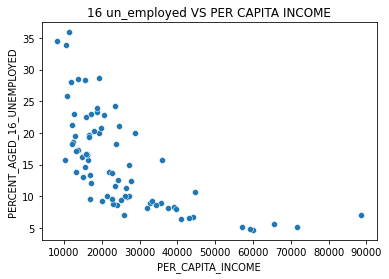

In [189]:
ax = sns.scatterplot(x = "PER_CAPITA_INCOME", y = "PERCENT_AGED_16_UNEMPLOYED", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PER_CAPITA_INCOME",
      ylabel = "PERCENT_AGED_16_UNEMPLOYED",
      title = "16 un_employed VS PER CAPITA INCOME")

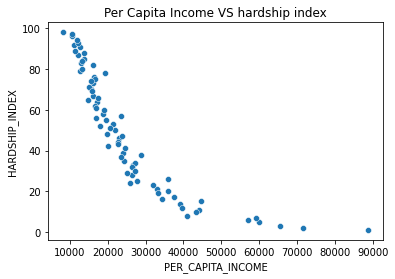

In [192]:
ax = sns.scatterplot(x = "PER_CAPITA_INCOME", y = "HARDSHIP_INDEX", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "PER_CAPITA_INCOME",
      ylabel = "HARDSHIP_INDEX",
      title = "Per Capita Income VS hardship index")

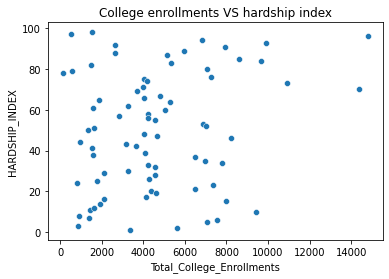

In [193]:
ax = sns.scatterplot(x = "Total_College_Enrollments", y = "HARDSHIP_INDEX", data = CHI_CENSUS_ANALYSIS )
 
ax.set(xlabel = "Total_College_Enrollments",
      ylabel = "HARDSHIP_INDEX",
      title = "College enrollments VS hardship index")

# **As the above established correlations show:
### As per capita income increases percent employed under 16 decrases, thus the likelihood of th college enrollment is high . 
**Also the above graphs shows that ther is a negative correlation betwen hardship indx and percapita income. i.e decreases as per capita income increass.
In other words, hardship indx is alsoan important factor.**

Now, let's examine if there are correlations percapita income, hardship index, college enrollements, and number of crimes

In [22]:
%%sql select cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,
cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX ,
sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments , count(*) as crime_number
from ((chi_census as cen inner join chi_school as sc on cen.community_area_number=sc.community_area_number)
      inner join chi_crime as cr on cen.community_area_number=cr.community_area_number)
group by cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,
cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX
limit 10

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


community_area_number,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,per_capita_income,hardship_index,total_college_enrollments,crime_number
1,Rogers Park,7.7,23.6,8.7,18.2,23939,39,24408,36
2,West Ridge,7.8,17.2,8.8,20.8,23040,46,57379,63
3,Uptown,3.8,24.0,8.9,11.8,35787,20,17552,28
4,Lincoln Square,3.4,10.9,8.2,13.4,37524,17,12396,15
5,North Center,0.3,7.5,5.2,4.5,57123,6,30164,28
6,Lake View,1.1,11.4,4.7,2.6,60058,5,77605,121
7,Lincoln Park,0.8,12.3,5.1,3.6,71551,2,28075,35
8,Near North Side,1.9,12.9,7.0,2.5,88669,1,50430,105
10,Norwood Park,2.0,5.4,9.0,11.5,32875,21,19407,24
11,Jefferson Park,2.7,8.6,12.4,13.4,27751,25,3510,4


In [23]:
CHI_CRIME=%sql select cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX ,sum(COLLEGE_ENROLLMENT) as Total_College_Enrollments , count(*) as crime_number from ((chi_census as cen inner join chi_school as sc on cen.community_area_number=sc.community_area_number) inner join chi_crime as cr on cen.community_area_number=cr.community_area_number) group by cen.COMMUNITY_AREA_NUMBER, cen.COMMUNITY_AREA_NAME,cen.PERCENT_OF_HOUSING_CROWDED,cen.PERCENT_HOUSEHOLDS_BELOW_POVERTY,cen.PERCENT_AGED_16__UNEMPLOYED,cen.PERCENT_AGED_25__WITHOUT_HIGH_SCHOOL_DIPLOMA,cen.PER_CAPITA_INCOME,cen.HARDSHIP_INDEX

 * ibm_db_sa://fll09902:***@ea286ace-86c7-4d5b-8580-3fbfa46b1c66.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:31505/BLUDB
Done.


In [24]:
CHI_CRIME_ANALYSIS=pd.DataFrame(CHI_CRIME)

In [34]:
CHI_CRIME_ANALYSIS.rename(columns={0:'COMMUNITY_AREA_NUMBER',1:'COMMUNITY_AREA_NAME',2:'percent_of_housing_crowded',3:'percent_households_below_poverty',4:'percent_aged_16__unemployed',5:'percent_aged_25__without_high_school_diploma',6:'per_capita_income',7:'hardship_index',8:'total_college_enrollments',9:'crime_number'}, inplace=True)

In [35]:
CHI_CRIME_ANALYSIS.head()

,COMMUNITY_AREA_NUMBER,COMMUNITY_AREA_NAME,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16__unemployed,percent_aged_25__without_high_school_diploma,per_capita_income,hardship_index,total_college_enrollments,crime_number
0,1,Rogers Park,7.7,23.6,8.7,18.2,23939,39,24408,36
1,2,West Ridge,7.8,17.2,8.8,20.8,23040,46,57379,63
2,3,Uptown,3.8,24.0,8.9,11.8,35787,20,17552,28
3,4,Lincoln Square,3.4,10.9,8.2,13.4,37524,17,12396,15
4,5,North Center,0.3,7.5,5.2,4.5,57123,6,30164,28


# **Plotting different relationships between data to figure out correlations**

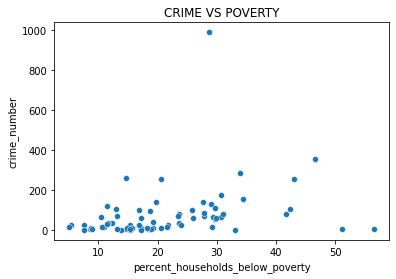

In [36]:
ax = sns.scatterplot(x = "percent_households_below_poverty", y = "crime_number", data = CHI_CRIME_ANALYSIS )
 
ax.set(xlabel = "percent_households_below_poverty",
      ylabel = "crime_number",
      title = "CRIME VS POVERTY")

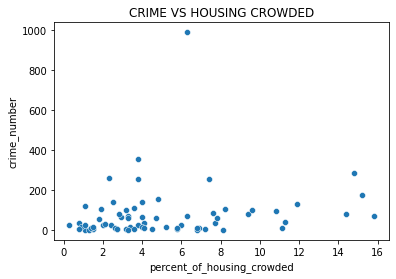

In [37]:
ax = sns.scatterplot(x = "percent_of_housing_crowded", y = "crime_number", data = CHI_CRIME_ANALYSIS )
 
ax.set(xlabel = "percent_of_housing_crowded",
      ylabel = "crime_number",
      title = "CRIME VS HOUSING CROWDED")

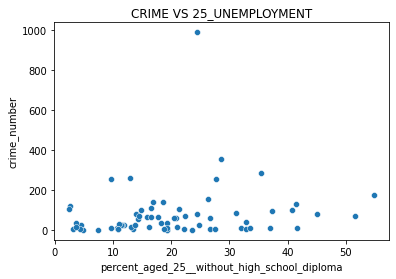

In [40]:
ax = sns.scatterplot(x = "percent_aged_25__without_high_school_diploma", y = "crime_number", data = CHI_CRIME_ANALYSIS )
 
ax.set(xlabel = "percent_aged_25__without_high_school_diploma",
      ylabel = "crime_number",
      title = "CRIME VS 25_UNEMPLOYMENT")

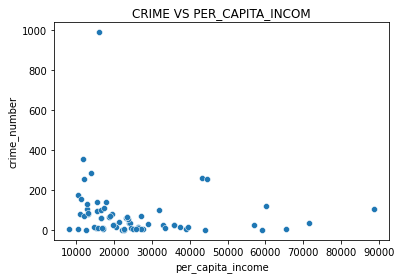

In [41]:
ax = sns.scatterplot(x = "per_capita_income", y = "crime_number", data = CHI_CRIME_ANALYSIS )
 
ax.set(xlabel = "per_capita_income",
      ylabel = "crime_number",
      title = "CRIME VS PER_CAPITA_INCOM")

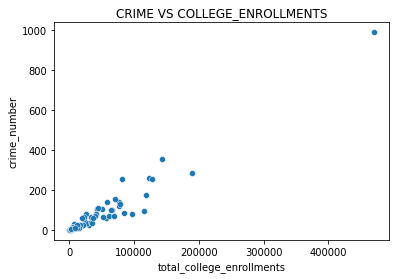

In [42]:
ax = sns.scatterplot(x = "total_college_enrollments", y = "crime_number", data = CHI_CRIME_ANALYSIS )
 
ax.set(xlabel = "total_college_enrollments",
      ylabel = "crime_number",
      title = "CRIME VS COLLEGE_ENROLLMENTS")

# **From the above shown graphs we can conclude that there's a strong positive correlation btween poverty and unemploymnt, and the crime numbers**